In [470]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [471]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [472]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df.data_somministrazione = pd.to_datetime(df.data_somministrazione)

In [473]:
df.sort_values('data_somministrazione', inplace=True)

In [474]:
df.head()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_over80,prima_dose,seconda_dose
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,0,1,0,0,0,1,0
96,2020-12-27,Pfizer/BioNTech,PIE,50-59,104,189,250,40,3,0,293,0
97,2020-12-27,Pfizer/BioNTech,PIE,60-69,94,37,113,9,9,0,131,0
98,2020-12-27,Pfizer/BioNTech,PIE,70-79,9,10,1,0,18,0,19,0
99,2020-12-27,Pfizer/BioNTech,PIE,80-89,5,19,0,0,24,0,24,0


In [475]:
df.data_somministrazione = df.data_somministrazione.dt.strftime("%d-%m-%Y")

In [476]:
df_pivot = (df.groupby(['data_somministrazione','fascia_anagrafica'])['prima_dose','seconda_dose'].sum().reset_index(level=0).
 pivot(columns='data_somministrazione', values='prima_dose').fillna(0))
df_pivot

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


data_somministrazione,01-01-2021,02-01-2021,03-01-2021,04-01-2021,05-01-2021,06-01-2021,07-01-2021,08-01-2021,09-01-2021,10-01-2021,...,19-01-2021,20-01-2021,21-01-2021,22-01-2021,23-01-2021,27-12-2020,28-12-2020,29-12-2020,30-12-2020,31-12-2020
fascia_anagrafica,,,,,,,,,,,,,,,,,,,,,
16-19,2.0,18.0,0.0,12.0,22.0,37.0,31.0,43.0,75.0,143.0,...,40.0,24.0,24.0,18.0,5.0,0.0,0.0,0.0,2.0,23.0
20-29,902.0,3452.0,3392.0,5807.0,6695.0,6515.0,7625.0,8805.0,8611.0,7320.0,...,2666.0,1831.0,1108.0,786.0,359.0,647.0,107.0,71.0,453.0,2330.0
30-39,1942.0,6789.0,6043.0,11851.0,13490.0,11193.0,14972.0,14895.0,13067.0,9793.0,...,3503.0,2723.0,1597.0,1139.0,564.0,1024.0,166.0,173.0,827.0,4212.0
40-49,2406.0,8297.0,7664.0,14321.0,16464.0,12748.0,18881.0,19051.0,15906.0,11349.0,...,4284.0,3622.0,2002.0,1525.0,637.0,1441.0,235.0,196.0,1185.0,5613.0
50-59,3172.0,10595.0,9966.0,19610.0,22703.0,17609.0,26240.0,26067.0,21887.0,15035.0,...,5418.0,4601.0,2536.0,1845.0,922.0,2114.0,276.0,274.0,1228.0,6977.0
60-69,1670.0,6378.0,5877.0,11728.0,13897.0,11706.0,15287.0,15365.0,16426.0,10548.0,...,3295.0,2655.0,1545.0,1090.0,761.0,1442.0,165.0,162.0,548.0,3467.0
70-79,183.0,592.0,526.0,1081.0,1536.0,1672.0,2203.0,2560.0,2905.0,2174.0,...,1653.0,1454.0,888.0,604.0,290.0,126.0,0.0,8.0,90.0,548.0
80-89,279.0,776.0,596.0,1349.0,1806.0,1512.0,2919.0,2898.0,2814.0,1650.0,...,3417.0,2811.0,1778.0,1089.0,522.0,114.0,1.0,9.0,158.0,998.0
90+,325.0,725.0,530.0,1234.0,1719.0,1385.0,2640.0,2513.0,2281.0,1279.0,...,2343.0,2078.0,1359.0,836.0,398.0,75.0,0.0,9.0,94.0,767.0


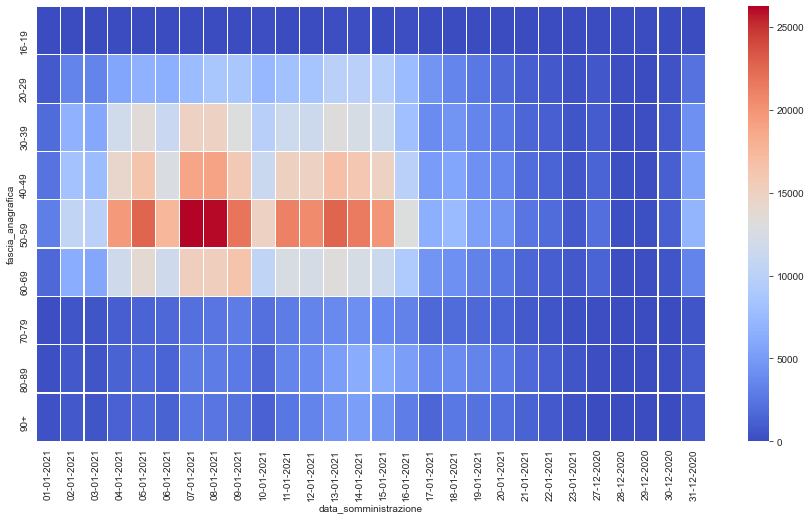

In [477]:

plt.figure(figsize=(15,8))
sns.heatmap(df_pivot, cmap='coolwarm', linecolor='white', linewidths=0.1)

In [478]:
daily = df.groupby('data_somministrazione')['prima_dose'].sum().reset_index()
df = df.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno'])

I need to groupby before calculating percentage as they are labelled by region as well

In [479]:
df1 = df.groupby(['data_somministrazione', 'fascia_anagrafica'])['prima_dose'].sum().reset_index(level=1).fillna(0)

In [480]:
df1 = df1.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno']).fillna(0)

In [481]:
df1['perc_tot_somministrati'] = (df1.prima_dose/df1.prima_dose_totale_giorno).mul(100).round(2)

In [482]:
df1_pivot = df1.pivot(columns='data_somministrazione',index='fascia_anagrafica',values='perc_tot_somministrati').sort_index(ascending=False)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text major ticklabel objects>)

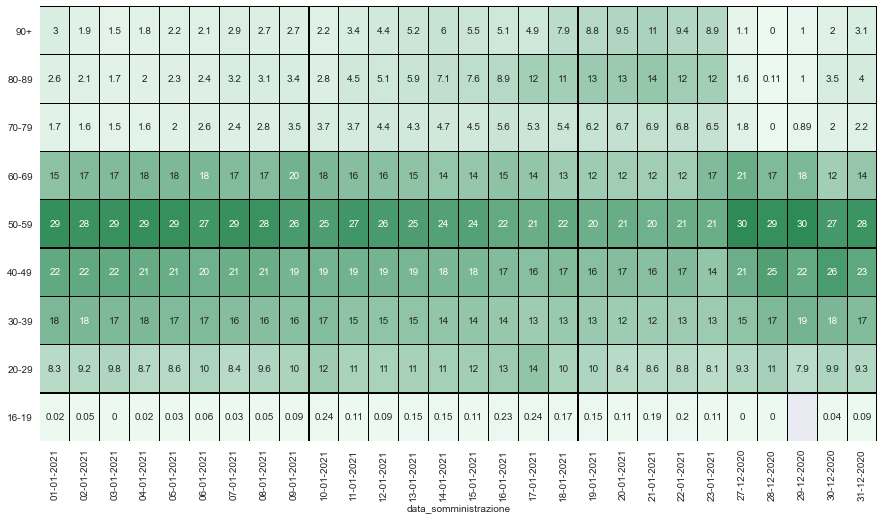

In [491]:
plt.figure(figsize=(15,8))
sns.heatmap(df1_pivot, cmap=sns.light_palette("seagreen", as_cmap=True)
,annot=True, linecolor='black', linewidths=0.1, cbar=False)
plt.ylabel('')
plt.yticks(rotation=0)
plt.suptitle('Percentuale ')

# Analisi Popolazione
Percentuale somministrazioni sul totale popolazione divisa per gruppi anagrafici

In [ ]:
pd.read_html('https://www.tuttitalia.it/statistiche/popolazione-eta-sesso-stato-civile-2020/')[0]


In [ ]:
pop = pd.read_html('https://it.wikipedia.org/wiki/Demografia_d%27Italia', thousands='.')[11]
pop = pop[['Età', 'Totale']]
pop.drop(index=101, axis=0, inplace=True)
pop.Totale = pd.to_numeric(pop.Totale)
pop.tail()

In [ ]:
pop['Età'] = pd.to_numeric(pop['Età'].str.split(' ', expand=True)[0])

In [ ]:
def ages(s):
    if (s['Età'] >= 0 and s['Età'] < 16):
        return '0-16'
    elif (s['Età'] >= 16 and s['Età'] <= 19):
        return '16-19'
    elif (s['Età'] >= 20 and s['Età'] <= 29):
        return '20-29'
    elif (s['Età'] >= 30 and s['Età'] <= 39):
        return '30-39'
    elif (s['Età'] >= 40 and s['Età'] <= 49):
        return '40-49'
    elif (s['Età'] >= 50 and s['Età'] <= 59):
        return '50-59'
    elif (s['Età'] >= 60 and s['Età'] <= 69):
        return '60-69'
    elif (s['Età'] >= 70 and s['Età'] <= 79):
        return '70-79'
    elif (s['Età'] >= 80 and s['Età'] <= 89):
        return '80-89'
    elif s['Età'] >= 90:
        return '90+'

def regrouping(s):
    if s['Età'] >= 0 | s['Età'] < 16:
        return '0-16'
    elif s['Età'] >= 16 | s['Età'] <= 19:
        return '16-19'
    elif s['Età'] >= 20 | s['Età'] <= 29:
        return '20-29'
    elif s['Età'] >= 30 | s['Età'] <= 39:
        return '30-39'
    elif s['Età'] >= 40 | s['Età'] <= 49:
        return '40-49'
    elif s['Età'] >= 50 | s['Età'] <= 59:
        return '50-59'
    elif s['Età'] >= 60 | s['Età'] <= 69:
        return '60-69'
    elif s['Età'] >= 70 | s['Età'] <= 79:
        return '70-79'
    elif s['Età'] >= 80 | s['Età'] <= 89:
        return '80-89'
    elif s['Età'] >= 90:
        return '90+'

In [ ]:

pop['gruppo'] = pop.apply(ages, axis=1)

In [ ]:
pop

In [ ]:
pop = pop.groupby('gruppo')['Totale'].sum().reset_index()
pop.gruppo = pop.gruppo.astype(str)

In [ ]:
pop

In [ ]:
df1 = df1.merge(pop, left_on='fascia_anagrafica', right_on='gruppo', how='inner')
df1.drop('gruppo', axis=1, inplace=True)
df1.rename(columns={'Totale':'totale_fascia'}, inplace=True)
df1.head()

In [ ]:
df2 = (df1.groupby(['data_somministrazione','fascia_anagrafica'])['prima_dose']
 .sum().groupby(level=0).cumsum().reset_index()
.merge(pop, left_on='fascia_anagrafica', right_on='gruppo')).drop(['gruppo'], axis=1)
df2.tail()

In [ ]:
df_last = df1.groupby('fascia_anagrafica')[['prima_dose','totale_fascia']].agg({'prima_dose':'sum','totale_fascia':'last'}).reset_index()

In [ ]:
df_last['perc_vaccinata'] = (df_last.prima_dose/df_last.totale_fascia).mul(100).round(2)

In [ ]:
df_last

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,7))
sns.barplot(data=df_last, x='fascia_anagrafica',y='perc_vaccinata', color='#176AA5').set_title('Elaborazione: @TomZ_UK - Dati: ISS/ISTAT', fontsize=12)
plt.ylabel('Percentuale', fontsize=16)
plt.xlabel('Fascia Anagrafica', fontsize=16)
plt.suptitle('Percentuale di Popolazione Vaccinata (Prima Dose)', fontsize=20)

plt.savefig('Percentuale_Pop.png')